<a href="https://colab.research.google.com/github/AkshayMinde/Programming-Languages-Analysis/blob/main/Programming_Languages_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

## Import Statements

In [43]:
import pandas as pd


## Data Exploration

In [44]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POST"], header=0)

In [45]:
print(df.head())
df.tail()

                  DATE       TAG  POST
0  2008-07-01 00:00:00        c#     3
1  2008-08-01 00:00:00  assembly     8
2  2008-08-01 00:00:00         c    83
3  2008-08-01 00:00:00        c#   505
4  2008-08-01 00:00:00       c++   164


,DATE,TAG,POST
2365,2022-10-01 00:00:00,php,3632
2366,2022-10-01 00:00:00,python,23237
2367,2022-10-01 00:00:00,r,4597
2368,2022-10-01 00:00:00,ruby,442
2369,2022-10-01 00:00:00,swift,1729


Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [46]:
df.shape

(2370, 3)

In [47]:
df.count()

DATE    2370
TAG     2370
POST    2370
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [48]:
df.groupby("TAG").sum()

,POST
TAG,
assembly,41393
c,387333
c#,1564182
c++,779435
delphi,50229
go,65239
java,1870120
javascript,2437236
perl,67194


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 


In [49]:
df.groupby("TAG").count()

,DATE,POST
TAG,,
assembly,171,171
c,171,171
c#,172,172
c++,171,171
delphi,171,171
go,156,156
java,171,171
javascript,171,171
perl,171,171


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [50]:
type(df["DATE"][1])

str

In [51]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [52]:
df.head()

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [64]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POST")
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,164.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1646.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,158.0,NaN


What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [54]:
reshaped_df.shape

(172, 14)

In [55]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [56]:
reshaped_df.count()

TAG
assembly      171
c             171
c#            172
c++           171
delphi        171
go            156
java          171
javascript    171
perl          171
php           171
python        171
r             169
ruby          171
swift         163
dtype: int64

Count the number of entries per programming language. Why might the number of entries be different? 

In [65]:
reshaped_df.fillna(0,inplace=True)

In [66]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,164.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1646.0,753.0,104.0,0.0,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,581.0,97.0,501.0,451.0,1.0,158.0,0.0


In [59]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

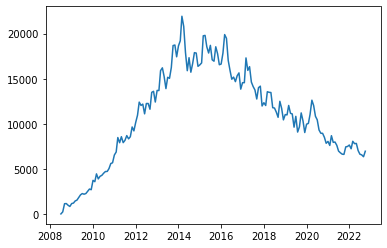

In [60]:
import matplotlib.pyplot as plt
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.show()

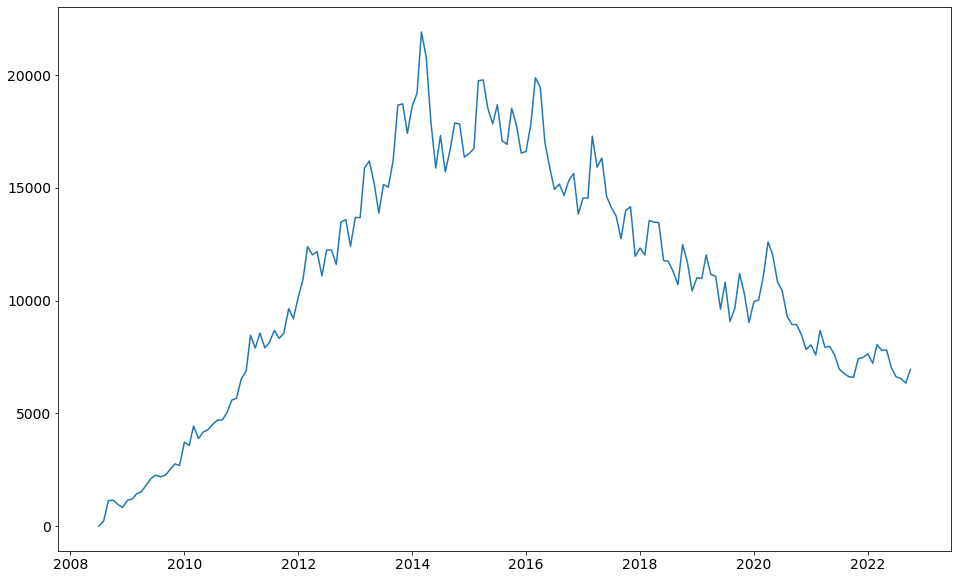

In [61]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.show()

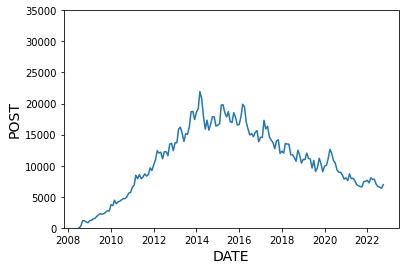

In [62]:
plt.xlabel("DATE", fontsize=14)
plt.ylabel("POST", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.show()

 Show two or more lines (e.g. for Java and Python) on the same chart.

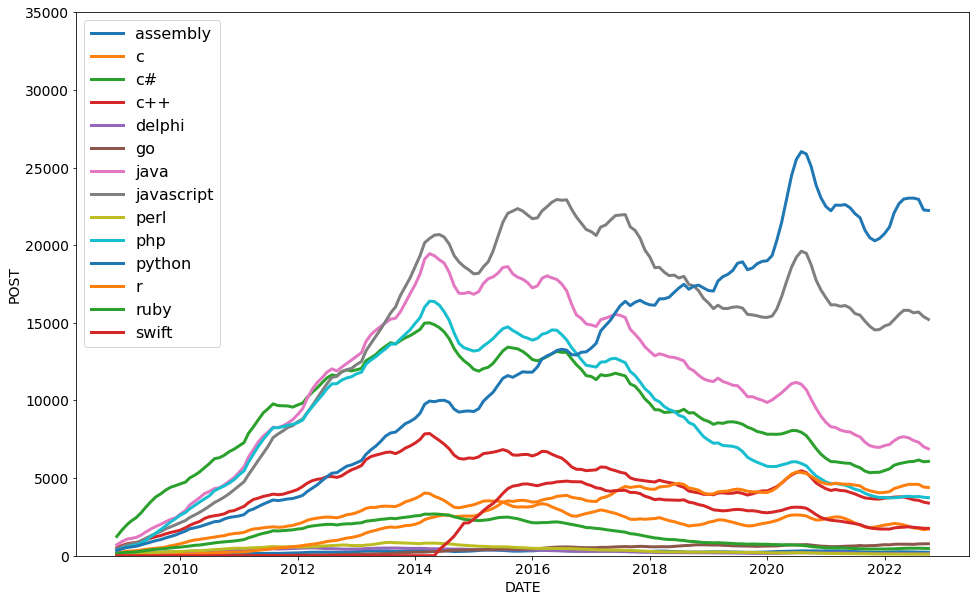

In [63]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("POST", fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth = 3, label = roll_df[column].name)
plt.legend(fontsize=16)
plt.show()